**Author: Jeremy**

Openning Day: 2018/1/11

- Objective

**build an algorithm that automatically suggests the right product prices.**

- Modules

In [1]:
from __future__ import print_function
import csv
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


## 1. Data Exploration

### 1.1 Data Loading

In [2]:
def load_tsv(path, hasColname):
        
    with open(path, encoding='utf-8') as tsvfile:
        reader = csv.reader(tsvfile, delimiter='\t')
        mydataList = []
        for row in reader:
            mydataList.append(row)            
    
    if hasColname:
        return pd.DataFrame(mydataList[1:], columns = mydataList[0])
    else:
        return pd.DataFrame(mydataList)

mypath = 'F:\\Projects\\Git\\MercariPriceSuggestionChallenge\\data\\'
#a = pd.DataFrame.from_csv(mypath + 'train.tsv', sep='\t')
train = load_tsv(mypath + 'train.tsv', True)
test = load_tsv(mypath + 'test.tsv', True)

### 1.2 Basic Exploration

In [3]:
#data view
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,,44.0,0,Complete with certificate of authenticity


In [4]:
#summary statistics
train.describe()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
count,1482535,1482535,1482535,1482535,1482535,1482535,1482535,1482535
unique,1482535,1225273,5,1288,4810,828,2,1281427
top,109881,Bundle,1,"Women/Athletic Apparel/Pants, Tights, Leggings",,10.0,0,No description yet
freq,1,2232,640549,60177,632682,99416,819435,82489


In [5]:
test.describe()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
count,693359,693359,693359,693359,693359,693359,693359
unique,693359,601117,5,1224,3901,2,609555
top,109881,Bundle,1,"Women/Athletic Apparel/Pants, Tights, Leggings",,0,No description yet
freq,1,1111,300081,27900,295525,382929,38503


In [6]:
#data types
train.dtypes

train_id             object
name                 object
item_condition_id    object
category_name        object
brand_name           object
price                object
shipping             object
item_description     object
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null object
name                 1482535 non-null object
item_condition_id    1482535 non-null object
category_name        1482535 non-null object
brand_name           1482535 non-null object
price                1482535 non-null object
shipping             1482535 non-null object
item_description     1482535 non-null object
dtypes: object(8)
memory usage: 90.5+ MB


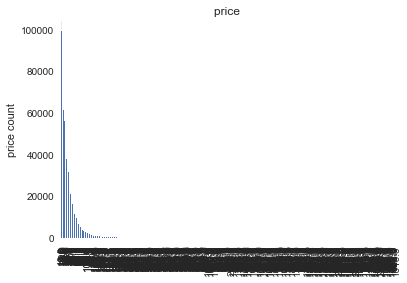

In [8]:
fig = plt.figure()
fig.set(alpha=0.2)

train.price.value_counts().plot(kind='bar')
plt.title(u"price ") # 标题
plt.ylabel(u"price count")
plt.show()

In [9]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,,8.0,0,I realized his pants are on backwards after th...


In [ ]:
brandArray = train[train['brand_name']!= '']['brand_name'].unique()

def get_brand_name(x):
    brand_name = x['brand_name']
    if brand_name == '':
        for brand in brandArray:
            if (brand in x['name']):
                brand_name = brand
                break
    return brand_name

In [ ]:
train['brand'] = train.apply(get_brand_name, axis=1)
train2 = train[train['brand_name'] == '']

In [ ]:
train2.describe()

In [ ]:
train2